# Behavioural Data (By Itself)

There is a separate d' value, per subject, for each load.
- `all_behav_vals` is the d' for each load, for each participant
- `avg_behav_vals` is the average d' across loads, for each participant 

Notes:
- There is an outlier subject, in the old group, who has really high d' (ind=29)

In [14]:
%matplotlib inline

from os.path import join as pjoin

import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [15]:
# Import custom code for this analysis
#% autoreload 2
from plts import *
from utils import *

### Settings

In [16]:
# Set path to load results from
res_path = '/Users/tom/Documents/Research/1-Projects/fooof/2-Data/Results/G2'

## Behavioural Data Analysis

In [17]:
# Load behavioural Data
behav_file = pjoin(res_path, 'Behav', 'neural_aging_data_behaviour.csv')
behav_dat = pd.read_csv(behav_file)

In [18]:
# Sanity check behavioural data
behav_dat.head()

,SubjID,Age,Load,CDA,d'
0,1,1,1,-0.442318,4.701454
1,2,1,1,-0.326298,3.934543
2,3,1,1,-1.291108,3.040111
3,4,1,1,-1.692917,4.733815
4,5,1,1,-0.173045,4.380097


In [19]:
# Collapse behavioural data across loads
avg_behav = behav_dat.groupby('SubjID').mean()

In [20]:
# Check average d', split up by age groups
avg_behav.groupby('Age')["d'"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
1,17.0,3.723283,0.781225,2.429116,2.907601,4.016855,4.217998,4.899760
2,14.0,3.105764,0.886168,1.390209,2.670936,3.090130,3.692970,4.751966


In [21]:
# Check average CDA, split up by age groups
avg_behav.groupby('Age')["CDA"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
1,17.0,-1.395421,1.145267,-4.305039,-2.073300,-0.952601,-0.711283,0.575874
2,14.0,-1.110141,0.467909,-1.850606,-1.414441,-1.246122,-0.751901,-0.415433


In [22]:
# Check correlations between d' and CDA measure
print_stat('All: \t', *pearsonr(avg_behav["CDA"], avg_behav["d'"]))
print_stat('Yng: \t', *pearsonr(avg_behav[avg_behav['Age'] == 1]["CDA"], avg_behav[avg_behav['Age'] == 1]["d'"]))
print_stat('Old: \t', *pearsonr(avg_behav[avg_behav['Age'] == 2]["CDA"], avg_behav[avg_behav['Age'] == 2]["d'"]))

All: 	: 	  0.0104 	0.9555
Yng: 	: 	  0.2805 	0.2755
Old: 	: 	 -0.4481 	0.1081


In [23]:
# Create behaviour plot
avg_behav_vals = np.concatenate([avg_behav[avg_behav['Age'] == 2]["d'"].values,
                                 avg_behav[avg_behav['Age'] == 1]["d'"].values])
all_behav_vals = np.concatenate([behav_dat[behav_dat['Age'] == 2]["d'"].values,
                                 behav_dat[behav_dat['Age'] == 1]["d'"].values])

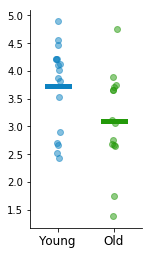

In [24]:
# Plot the comparison of the averaged (across loads) d', split up by group
plot_comp_scatter(avg_behav_vals)

In [25]:
# Statistically compare the difference in avg behaviour between yng & old
ttest_ind(avg_behav_vals[YNG_INDS], avg_behav_vals[OLD_INDS])

Ttest_indResult(statistic=2.061705493268976, pvalue=0.04829911348520237)

#### Check behavioural difference split up by load

In [27]:
def get_load(behav_dat, load):
    """Helper function to get behav from a specific load."""
    
    temp = behav_dat[behav_dat["Load"] == load]
    load_vals = np.concatenate([temp[temp['Age'] == 2]["d'"].values,
                                temp[temp['Age'] == 1]["d'"].values])
    
    return load_vals

In [76]:
# Collect and print comparison across loads data
loads_data = []
for load in [1, 2, 3]:
    
    load_vals = get_load(behav_dat, load)
    
    cur_dat = {}
    cur_dat['load'] = load
    print('LOAD:', str(load))
    
    cur_dat['yng_mean'] = np.mean(load_vals[YNG_INDS])
    cur_dat['old_mean'] = np.mean(load_vals[OLD_INDS])
    print('\tMean YNG: {:1.2f}'.format(cur_dat['yng_mean']))
    print('\tMean OLD: {:1.2f}'.format(cur_dat['old_mean']))
    
    cur_dat['yng_std'] = np.std(load_vals[YNG_INDS])
    cur_dat['old_std'] = np.std(load_vals[OLD_INDS])
        
    cur_dat['dif'] = np.mean(load_vals[YNG_INDS] - np.mean(load_vals[OLD_INDS]))
    print('\tDiff\t', cur_dat['dif'])

    cur_dat['ttest'] = ttest_ind(load_vals[YNG_INDS], load_vals[OLD_INDS])
    print('\tT-Test\t {:1.4f} {:1.4f}'.format(*cur_dat['ttest']))
    
    loads_data.append(cur_dat)

LOAD: 1
	Mean YNG: 3.96
	Mean OLD: 3.62
	Diff	 0.34713751982773156
	T-Test	 1.1341 0.2660
LOAD: 2
	Mean YNG: 3.84
	Mean OLD: 3.24
	Diff	 0.5985745321134457
	T-Test	 1.9911 0.0560
LOAD: 3
	Mean YNG: 3.37
	Mean OLD: 2.47
	Diff	 0.906845622542017
	T-Test	 2.5969 0.0146


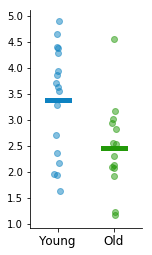

In [77]:
# Plot the comparison for specific load
load_vals = get_load(behav_dat, 3)
plot_comp_scatter(load_vals)

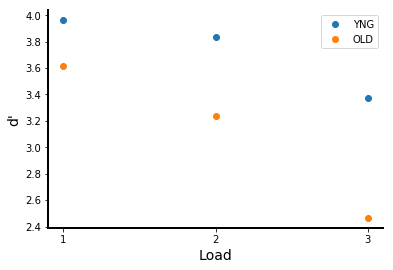

In [91]:
# Plot the average behaviour, per age group, across loads
fig, ax = plt.subplots(figsize=[6, 4])

plt.plot([1, 2, 3], [dat['yng_mean'] for dat in loads_data], '.', markersize=12, label='YNG')
plt.plot([1, 2, 3], [dat['old_mean'] for dat in loads_data], '.', markersize=12, label='OLD')
plt.legend()

plt.xlabel('Load', fontsize=14)
plt.xticks([1, 2, 3], ['1', '2', '3'])
plt.ylabel("d'", fontsize=14);

from plts import _set_lr_spines
_set_lr_spines(ax, lw=2)

#### So - why is load 3 so much worse?

Here, get the change in behaviour within subjects, between loads.

Can see that old subjects have a much bigger deterioration in behaviour across loads than in the old group.

In [99]:
# Collect all d's into a 2D matrix to calculate the delta-d between conditions
ds_all = np.flipud(np.vstack([behav_dat[behav_dat["Load"] == 1]["d'"].values,
                              behav_dat[behav_dat["Load"] == 2]["d'"].values,  
                              behav_dat[behav_dat["Load"] == 3]["d'"].values]).T)
d_diffs = np.diff(ds_all)

In [100]:
# Average across differences between loads 1-2 & 2-3
mean_diffs = np.mean(d_diffs, 1)

# Check for statistical difference in delta-d'
ttest_ind(mean_diffs[OLD_INDS], mean_diffs[YNG_INDS])

Ttest_indResult(statistic=-2.580676340366138, pvalue=0.015188157594471542)

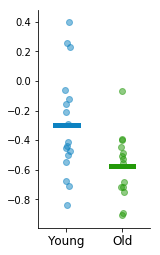

In [101]:
# Plot the comparison of the average delta-d
plot_comp_scatter(mean_diffs)